In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 한글 안 깨지게
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 폰트설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
import matplotlib.font_manager as fm

# Assuming 'font_path.ttf' is the path to your NanumGothic font file
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final.csv', parse_dates=["DATE"])

In [ ]:
df.columns

Index(['DATE', 'GDP(십억원)', 'GNI(십억원)', 'GDP_GROWTH(%)', 'KOSPI', '국고채(3년)(%)',
       '국고채(10년)(%)', '뉴스심리지수', '경제심리지수', '수출금액지수', '수입금액지수', '수출물가지수(원화기준)',
       '수출물가지수(계약통화기준)', '수출물가지수(달러기준)', '수입물가지수(원화기준)', '수입물가지수(계약통화기준)',
       '수입물가지수(달러기준)', '대외채권', '대외채무', '순대외채권', '외환보유액(천달러)', '기준금리',
       'CD(91일)', '무담보콜금리(1일, 전체거래)', '경상수지(계절조정)', 'CPI', 'PPI',
       '원/미국달러(매매기준율)', '일본엔/달러', '달러/유로', '미국기준금리', 'NASDAQ', '위안화/달러',
       '미국CPI', '미국PPI', '본원 통화(달러 발행량)', '미국 소비자심리지수', '금', '은', '원유',
       '한국실업률', '미국실업률'],
      dtype='object')

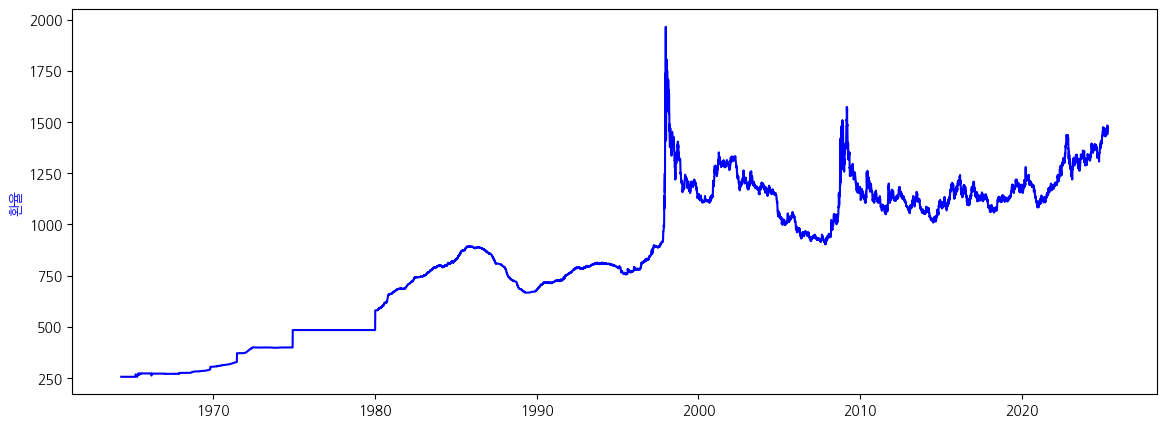

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(df["DATE"], df["원/미국달러(매매기준율)"], label="원/달러 환율", color="blue")
plt.ylabel("환율",  color="blue")
plt.show()

대외채무가 많을수록 확율이 상승한다.

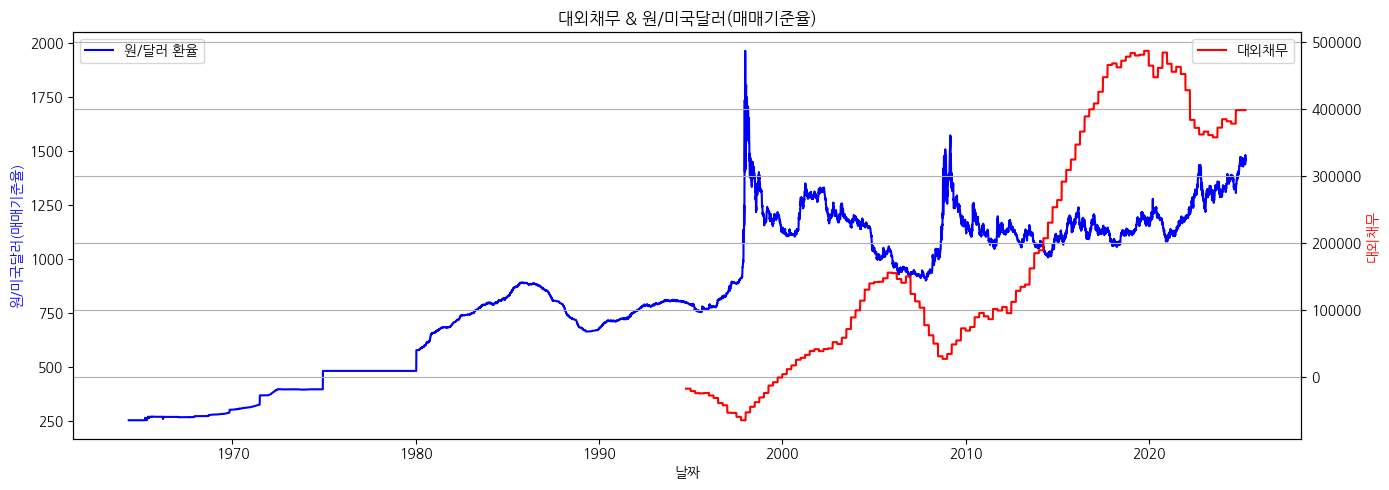

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(df["DATE"], df["원/미국달러(매매기준율)"], label="원/달러 환율", color="blue")
plt.ylabel("원/미국달러(매매기준율)",  color="blue")
plt.xlabel("날짜")
plt.legend(loc='upper left')
plt.twinx()
plt.plot(df["DATE"], df["대외채무"], label="대외채무", color="red")
plt.ylabel("대외채무", color="red")
plt.legend()
plt.title("대외채무 & 원/미국달러(매매기준율)")
plt.grid(True)
plt.tight_layout()
plt.show()

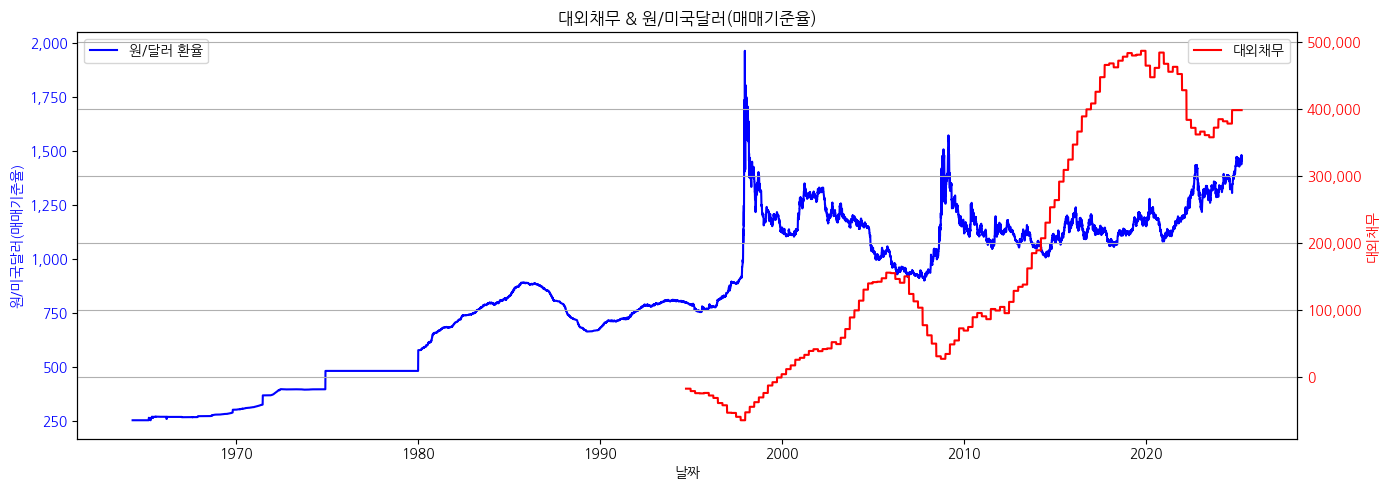

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots(figsize=(14, 5))

# 첫 번째 y축 (원/달러 환율)
ax1.plot(df["DATE"], df["원/미국달러(매매기준율)"], label="원/달러 환율", color="blue")
ax1.set_ylabel("원/미국달러(매매기준율)", color="blue")
ax1.set_xlabel("날짜")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # 콤마 표시
ax1.legend(loc='upper left')

# 두 번째 y축 (대외채무)
ax2 = ax1.twinx()
ax2.plot(df["DATE"], df["대외채무"], label="대외채무", color="red")
ax2.set_ylabel("대외채무", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # 콤마 표시
ax2.legend(loc='upper right')

plt.title("대외채무 & 원/미국달러(매매기준율)")
plt.grid(True)
plt.tight_layout()
plt.show()


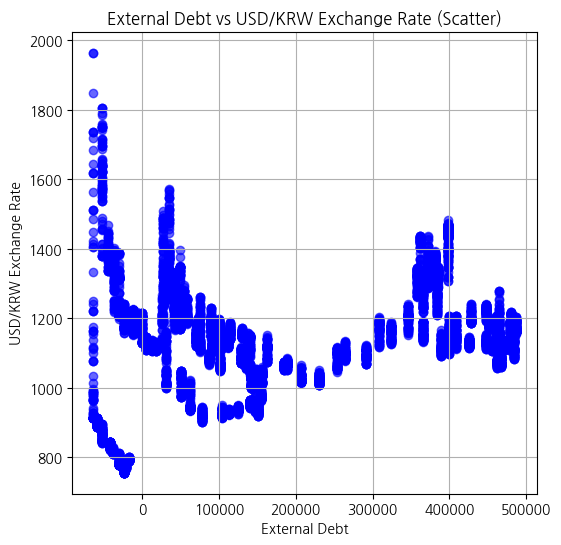

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df['대외채무'], df['원/미국달러(매매기준율)'], alpha=0.6, color='blue')
plt.xlabel("External Debt")
plt.ylabel("USD/KRW Exchange Rate")
plt.title("External Debt vs USD/KRW Exchange Rate (Scatter)")
plt.grid(True)
plt.show()

In [ ]:
correlation = df[['대외채무', '원/미국달러(매매기준율)']].corr().iloc[0,1]
print(f"상관계수: {correlation}")

상관계수: 0.2752765241624466


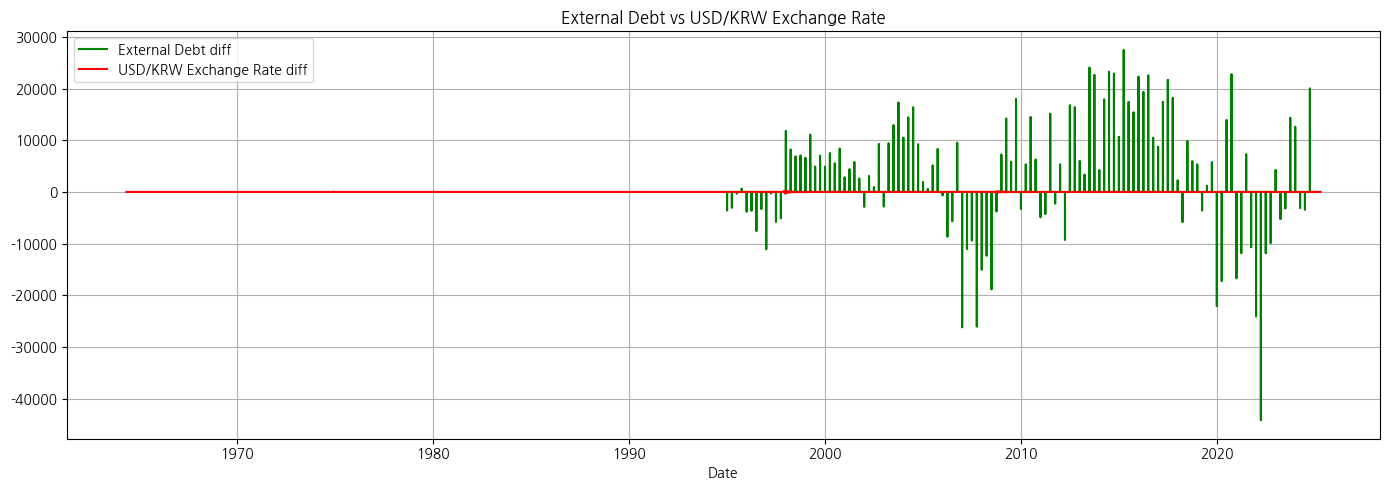

In [ ]:
df['대외채무_diff'] = df['대외채무'].diff()
df['환율_diff'] = df['원/미국달러(매매기준율)'].diff()

plt.figure(figsize=(14,5))
plt.plot(df['DATE'], df['대외채무_diff'], label="External Debt diff", color='green')
plt.plot(df['DATE'], df['환율_diff'], label="USD/KRW Exchange Rate diff", color='red')
plt.title("External Debt vs USD/KRW Exchange Rate")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 상관관계
vol_corr = df[["대외채무_diff", "환율_diff"]].dropna().corr()
print("대외채무 변화량 & 환율 변동폭 상관:")
print(vol_corr)

대외채무 변화량 & 환율 변동폭 상관:
           대외채무_diff   환율_diff
대외채무_diff   1.000000 -0.001288
환율_diff    -0.001288  1.000000


In [ ]:
df['대외채무_lag1'] = df['대외채무'].shift(30)
lag_corr = df[['대외채무_lag1', '원/미국달러(매매기준율)']].corr().iloc[0,1]
print(f"1개월 시차 상관계수: {lag_corr:.3f}")

1개월 시차 상관계수: 0.267


In [ ]:
# 두 시리즈를 하나로 합치고, 결측치가 있는 행은 제거 공적분검사
coint_data1 = df[["원/미국달러(매매기준율)", "대외채무"]].dropna()

from statsmodels.tsa.stattools import coint
score, pvalue, _ = coint(coint_data1["원/미국달러(매매기준율)"], coint_data1["대외채무"])
print("p-value:", pvalue)

p-value: 0.05727341907506043


약한 공적분 관계

In [ ]:
from statsmodels.tsa.stattools import adfuller

# 결측치 제거
df_clean = df[["대외채무", "원/미국달러(매매기준율)"]].dropna()

# ADF 검정
adf_debt = adfuller(df_clean["대외채무"])
adf_ex = adfuller(df_clean["원/미국달러(매매기준율)"])

print("대외채무 ADF p-value:", adf_debt[1])
print("원/미국달러(매매기준율) ADF p-value:", adf_ex[1])

대외채무 ADF p-value: 0.9360938460950611
원/미국달러(매매기준율) ADF p-value: 0.024410095179919433


대외채무가 비정상이라 대외채무 차분

In [ ]:
from statsmodels.tsa.stattools import adfuller

# 대외채무 차분
df["대외채무_diff"] = df["대외채무"].diff()

# 차분한 대외채무 ADF 검정
adf_result_diff = adfuller(df["대외채무_diff"].dropna())
print("차분한 대외채무 ADF p-value:", adf_result_diff[1])

차분한 대외채무 ADF p-value: 0.0


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# 그레인저 검정용 데이터프레임 생성
granger_df = df[["원/미국달러(매매기준율)", "대외채무_diff"]].dropna()

# 그레인저 인과성 검정 (최대 시차 5)
grangercausalitytests(granger_df, maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8376  , p=0.3601  , df_denom=11148, df_num=1
ssr based chi2 test:   chi2=0.8378  , p=0.3600  , df=1
likelihood ratio test: chi2=0.8378  , p=0.3600  , df=1
parameter F test:         F=0.8376  , p=0.3601  , df_denom=11148, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3206  , p=0.0133  , df_denom=11145, df_num=2
ssr based chi2 test:   chi2=8.6451  , p=0.0133  , df=2
likelihood ratio test: chi2=8.6418  , p=0.0133  , df=2
parameter F test:         F=4.3206  , p=0.0133  , df_denom=11145, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9188  , p=0.0328  , df_denom=11142, df_num=3
ssr based chi2 test:   chi2=8.7618  , p=0.0326  , df=3
likelihood ratio test: chi2=8.7584  , p=0.0327  , df=3
parameter F test:         F=2.9188  , p=0.0328  , df_denom=11142, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.2117  

{np.int64(1): ({'ssr_ftest': (np.float64(0.8375622893669971),
    np.float64(0.3601146839821542),
    np.float64(11148.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.8377876828786673),
    np.float64(0.3600302620832315),
    np.int64(1)),
   'lrtest': (np.float64(0.8377562124805991),
    np.float64(0.36003928463802326),
    np.int64(1)),
   'params_ftest': (np.float64(0.8375622893725818),
    np.float64(0.3601146839807342),
    np.float64(11148.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(4.320616147049763),
    np.float64(0.013313961920671436),
    np.float64(11145.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(8.645109024603832),
    np.float64(0.013265952183808757),
    np.int64(2)),
   'lrtest': (np.float64(8.641759280173574),
    np.float64(0.013288189575725225),
    np.int64(2)),
   'params_ftest': (np.float64(4.320616147058712),
    np.float64(0.013313961920564677),
    np.float64(11145.0),
    2.0)},
   array([[0., 0., 1., 0.

상관관계는 존재하지만 약하게 나타났고,

공적분 검정에서는 두 변수 간에 장기적인 균형 관계가 없다고 판단되며,

그레인저 인과성 검정에서는 인과관계가 존재한다고 볼 수 있습니다.


이 결과를 바탕으로, 두 변수 간에 단기적인 인과관계는 있지만, 장기적인 균형 관계는 없다고 할 수 있습니다.

In [ ]:
import statsmodels.api as sm

# NaN 제거를 위해 데이터프레임 하나로 합침
df_clean = df[["대외채무", "원/미국달러(매매기준율)"]].dropna()

X = sm.add_constant(df_clean["대외채무"])
y = df_clean["원/미국달러(매매기준율)"]

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          원/미국달러(매매기준율)   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     914.3
Date:                Mon, 21 Apr 2025   Prob (F-statistic):          4.23e-193
Time:                        05:11:55   Log-Likelihood:                -72086.
No. Observations:               11153   AIC:                         1.442e+05
Df Residuals:                   11151   BIC:                         1.442e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1086.2178      2.087    520.360      0.000    1082.126    1090.310
대외채무           0.0002   8.22e-06     30.237      0.000       0.000       0.000
==============================================================================
Omnibus:                      489.730   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              791.347
Skew:                           0.384   Prob(JB):                    1.45e-172
Kurtosis:                       4.056   Cond. No.                     3.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

PPI(생산자물가지수)가 높을수록 환율이 상승한다.

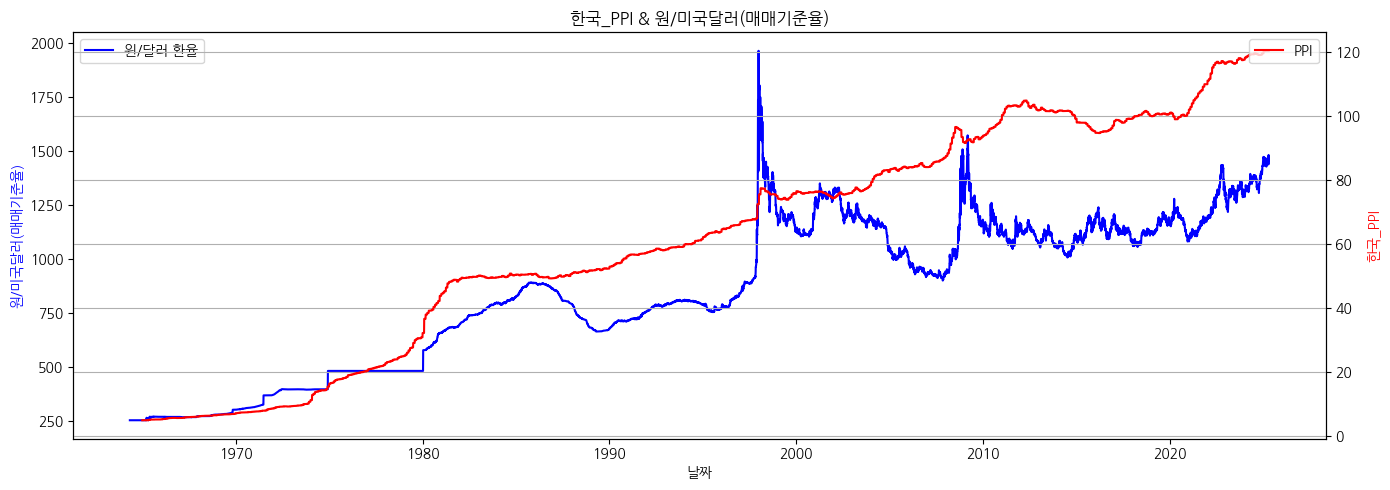

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(df["DATE"], df["원/미국달러(매매기준율)"], label="원/달러 환율", color="blue")
plt.ylabel("원/미국달러(매매기준율)",  color="blue")
plt.xlabel("날짜")
plt.legend(loc='upper left')
plt.twinx()
plt.plot(df["DATE"], df["PPI"], label="PPI", color="red")
plt.ylabel("한국_PPI", color="red")
plt.legend(loc='upper right')
plt.title("한국_PPI & 원/미국달러(매매기준율)")
plt.grid(True)
plt.tight_layout()
plt.show()

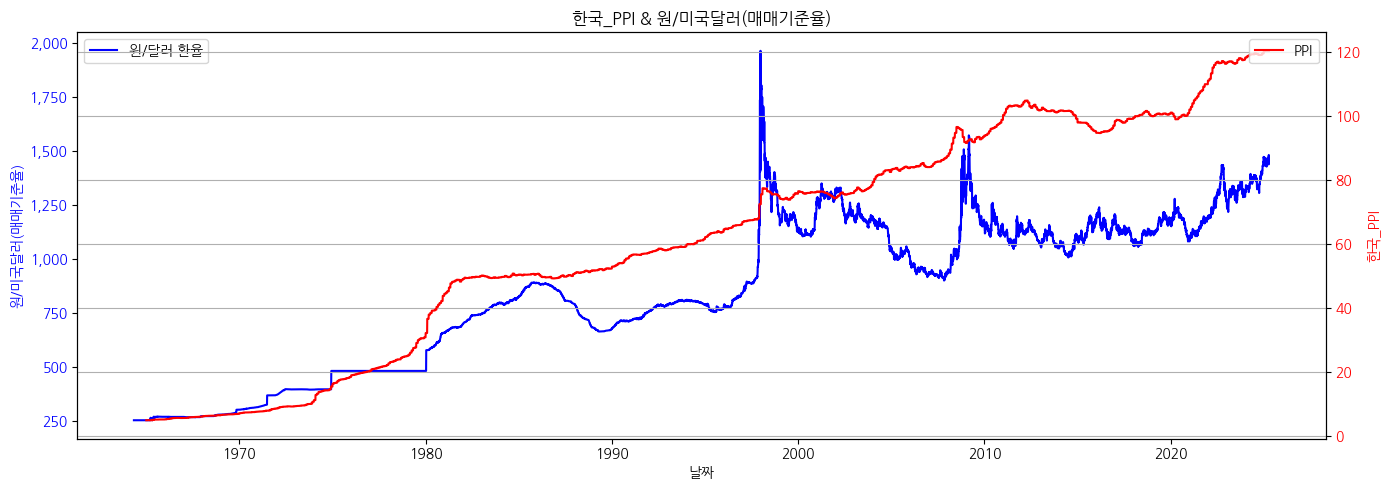

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots(figsize=(14, 5))

# 첫 번째 y축 (원/달러 환율)
ax1.plot(df["DATE"], df["원/미국달러(매매기준율)"], label="원/달러 환율", color="blue")
ax1.set_ylabel("원/미국달러(매매기준율)", color="blue")
ax1.set_xlabel("날짜")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # 콤마 추가
ax1.legend(loc='upper left')

# 두 번째 y축 (PPI)
ax2 = ax1.twinx()
ax2.plot(df["DATE"], df["PPI"], label="PPI", color="red")
ax2.set_ylabel("한국_PPI", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # 콤마 추가
ax2.legend(loc='upper right')

plt.title("한국_PPI & 원/미국달러(매매기준율)")
plt.grid(True)
plt.tight_layout()
plt.show()

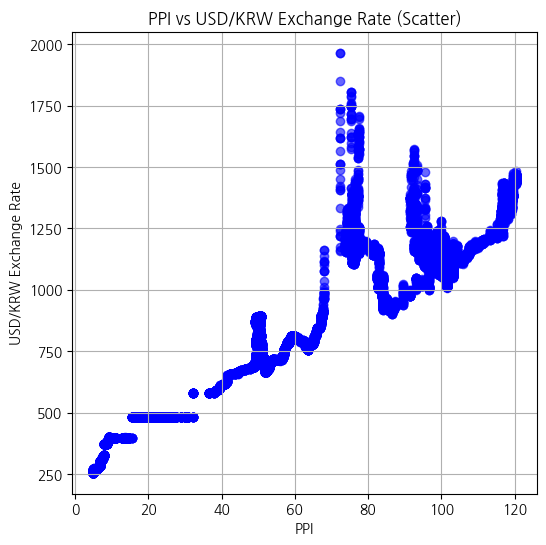

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df["PPI"], df["원/미국달러(매매기준율)"], alpha=0.6, color="blue")
plt.xlabel("PPI")
plt.ylabel("USD/KRW Exchange Rate")
plt.title("PPI vs USD/KRW Exchange Rate (Scatter)")
plt.grid(True)
plt.show()

In [ ]:
corr_ppi_fx = df[["PPI", "원/미국달러(매매기준율)"]].corr().iloc[0,1]
print(f"PPI와 환율의 상관계수: {corr_ppi_fx}")

PPI와 환율의 상관계수: 0.9352837657140644


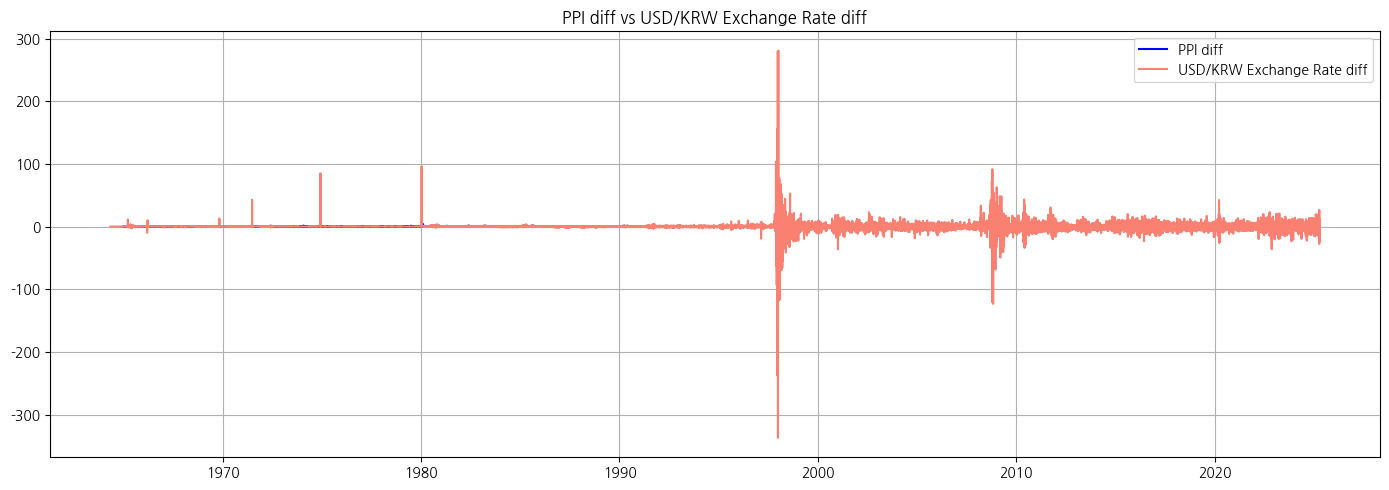

In [ ]:
df["PPI_diff"] = df["PPI"].diff()
df["환율_diff"] = df["원/미국달러(매매기준율)"].diff()

plt.figure(figsize=(14, 5))
plt.plot(df["DATE"], df["PPI_diff"], label="PPI diff", color="blue")
plt.plot(df["DATE"], df["환율_diff"], label="USD/KRW Exchange Rate diff", color="salmon")
plt.title("PPI diff vs USD/KRW Exchange Rate diff")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 상관관계
vol_corr = df[["PPI_diff", "환율_diff"]].dropna().corr()
print("PPI 변화량 & 환율 변동폭 상관:")
print(vol_corr)

PPI 변화량 & 환율 변동폭 상관:
          PPI_diff   환율_diff
PPI_diff  1.000000  0.003684
환율_diff   0.003684  1.000000


In [ ]:
df["PPI_lag1"] = df["PPI"].shift(30)
lag_corr_ppi_fx = df[["PPI_lag1", "원/미국달러(매매기준율)"]].corr().iloc[0,1]
print(f"PPI 1개월 시차 상관계수: {lag_corr_ppi_fx}")

PPI 1개월 시차 상관계수: 0.9349764243415889


In [ ]:
# 두 시리즈를 하나로 합치고, 결측치가 있는 행은 제거 공적분검사
coint_data = df[["원/미국달러(매매기준율)", "PPI"]].dropna()

from statsmodels.tsa.stattools import coint
score, pvalue, _ = coint(coint_data["원/미국달러(매매기준율)"], coint_data["PPI"])
print("p-value:", pvalue)

p-value: 0.0009585461651283344


In [ ]:
from statsmodels.tsa.stattools import adfuller

# 결측치 제거
df_clean = df[["PPI", "원/미국달러(매매기준율)"]].dropna()

# ADF 검정
adf_PPI = adfuller(df_clean["PPI"])
adf_ex = adfuller(df_clean["원/미국달러(매매기준율)"])

print("PPI ADF p-value:", adf_PPI[1])
print("원/미국달러(매매기준율) ADF p-value:", adf_ex[1])

PPI ADF p-value: 0.9292513335846733
원/미국달러(매매기준율) ADF p-value: 0.4485214646645069


In [ ]:
from statsmodels.tsa.stattools import adfuller

# 차분
df["PPI_diff"] = df["PPI"].diff()
df["환율_diff"] = df["원/미국달러(매매기준율)"].diff()

# 결측치 제거 후 ADF 검정
adf_ppi_diff = adfuller(df["PPI_diff"].dropna())
adf_fx_diff = adfuller(df["환율_diff"].dropna())

print("차분한 PPI ADF p-value:", adf_ppi_diff[1])
print("차분한 원/미국달러(매매기준율) ADF p-value:", adf_fx_diff[1])

차분한 PPI ADF p-value: 2.2915526279847264e-26
차분한 원/미국달러(매매기준율) ADF p-value: 2.177114433517963e-30


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# 차분한 데이터 준비
df["PPI_diff"] = df["PPI"].diff()
df["환율_diff"] = df["원/미국달러(매매기준율)"].diff()

# 결측치 제거
granger_df = df[["환율_diff", "PPI_diff"]].dropna()

# 그레인저 인과성 검정 (최대 시차 5)
grangercausalitytests(granger_df, maxlag=5, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1034  , p=0.7478  , df_denom=22013, df_num=1
ssr based chi2 test:   chi2=0.1034  , p=0.7478  , df=1
likelihood ratio test: chi2=0.1034  , p=0.7478  , df=1
parameter F test:         F=0.1034  , p=0.7478  , df_denom=22013, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=88.9960 , p=0.0000  , df_denom=22010, df_num=2
ssr based chi2 test:   chi2=178.0324, p=0.0000  , df=2
likelihood ratio test: chi2=177.3164, p=0.0000  , df=2
parameter F test:         F=88.9960 , p=0.0000  , df_denom=22010, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=61.9520 , p=0.0000  , df_denom=22007, df_num=3
ssr based chi2 test:   chi2=185.9152, p=0.0000  , df=3
likelihood ratio test: chi2=185.1346, p=0.0000  , df=3
parameter F test:         F=61.9520 , p=0.0000  , df_denom=22007, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=50.4225 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{np.int64(1): ({'ssr_ftest': (np.float64(0.10340647224122672),
    np.float64(0.7477824611253652),
    np.float64(22013.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.10342056479638612),
    np.float64(0.7477628061350441),
    np.int64(1)),
   'lrtest': (np.float64(0.10342032191692851),
    np.float64(0.7477630922497555),
    np.int64(1)),
   'params_ftest': (np.float64(0.1034064722442709),
    np.float64(0.7477824611196067),
    np.float64(22013.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(88.99599465259077),
    np.float64(3.198702019155143e-39),
    np.float64(22010.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(178.0324236507756),
    np.float64(2.191545058806106e-39),
    np.int64(2)),
   'lrtest': (np.float64(177.3164187645889),
    np.float64(3.134937521290387e-39),
    np.int64(2)),
   'params_ftest': (np.float64(88.99599465259053),
    np.float64(3.198702019155143e-39),
    np.float64(22010.0),
    2.0)},
   array([[0., 0., 

상관계수가 매우 강한 선형 관계를 나타내며,

공적분 검정에서 p-value가 매우 작아 두 시계열 간에 장기적인 균형 관계가 존재한다고 할 수 있고,

그레인저 인과성 검정에서 p-value가 0에 가까워 두 변수 간에 유의미한 인과관계가 있음을 확인할 수 있습니다.

따라서, 이 경우에는 두 시계열 간에 강한 상관 관계와 장기적인 균형 관계가 있으며, 단기적인 인과관계도 존재한다고 해석할 수 있습니다. 두 변수는 서로 강하게 영향을 미치며, 장기적으로 서로를 조정하는 관계에 있습니다.

In [ ]:
import statsmodels.api as sm

# 결측치 제거
ppi_df = df[["PPI", "원/미국달러(매매기준율)"]].dropna()

# 변수 설정
X = sm.add_constant(ppi_df["PPI"])  # 독립변수 (상수항 포함)
y = ppi_df["원/미국달러(매매기준율)"]  # 종속변수

# OLS 회귀분석
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          원/미국달러(매매기준율)   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                 1.538e+05
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        05:12:23   Log-Likelihood:            -1.3659e+05
No. Observations:               22018   AIC:                         2.732e+05
Df Residuals:                   22016   BIC:                         2.732e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        288.2050      1.650    174.717      0.000     284.972     291.438
PPI            9.1307      0.023    392.133      0.000       9.085       9.176
==============================================================================
Omnibus:                     8610.219   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40102.093
Skew:                           1.876   Prob(JB):                         0.00
Kurtosis:                       8.444   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**PPI(생산자물가지수)**와 환율(원/달러) 사이에는
장기적인 안정된 관계가 있다는 뜻이야.

둘 다 각각은 불안정하게 움직이지만,
함께 움직이는 패턴이 일정하게 유지되는 경향이 있다는 거야.

본원통화(달러 발행량)가 줄어들수록 환율이 하락한다.

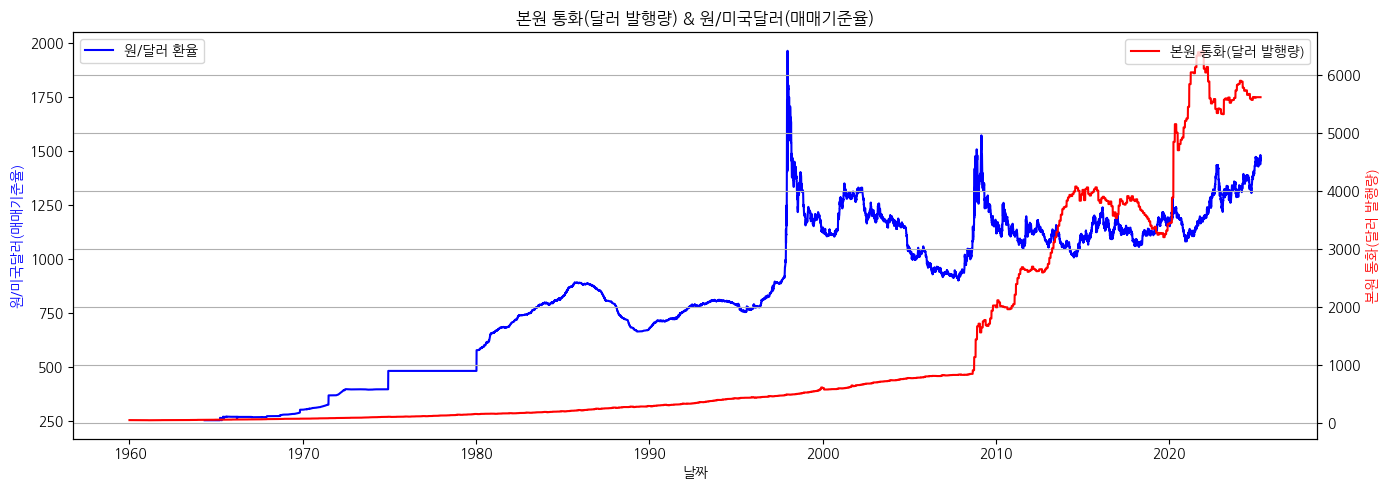

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(df["DATE"], df["원/미국달러(매매기준율)"], label="원/달러 환율", color="blue")
plt.ylabel("원/미국달러(매매기준율)",  color="blue")
plt.xlabel("날짜")
plt.legend(loc='upper left')
plt.twinx()
plt.plot(df["DATE"], df["본원 통화(달러 발행량)"], label="본원 통화(달러 발행량)", color="red")
plt.ylabel("본원 통화(달러 발행량)", color="red")
plt.legend(loc='upper right')
plt.title("본원 통화(달러 발행량) & 원/미국달러(매매기준율)")
plt.grid(True)
plt.tight_layout()
plt.show()

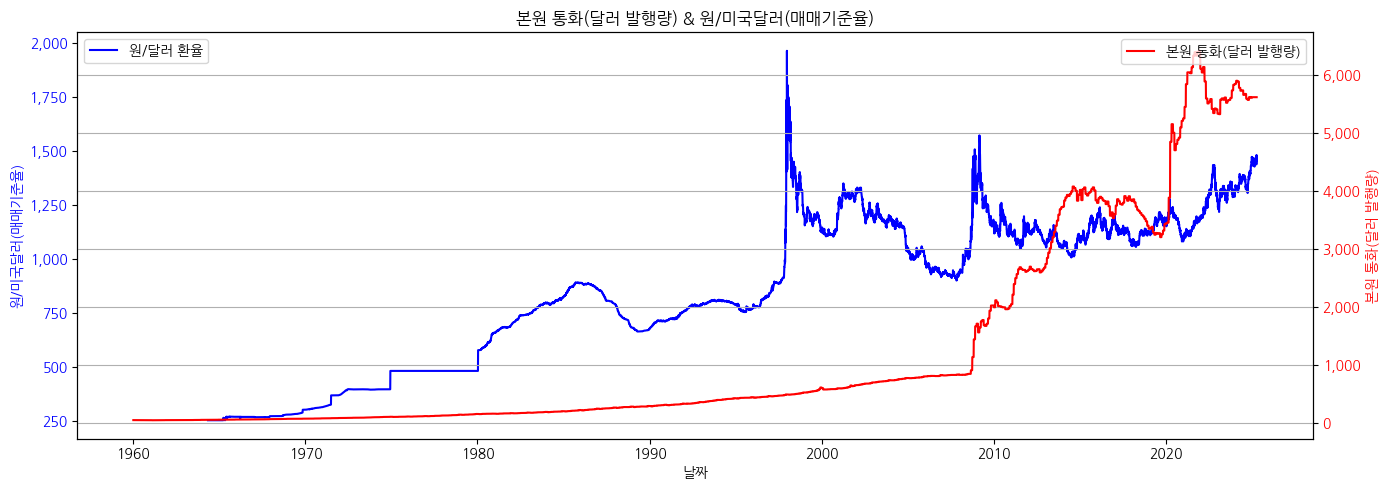

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots(figsize=(14, 5))

# 첫 번째 y축: 원/달러 환율
ax1.plot(df["DATE"], df["원/미국달러(매매기준율)"], label="원/달러 환율", color="blue")
ax1.set_ylabel("원/미국달러(매매기준율)", color="blue")
ax1.set_xlabel("날짜")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.legend(loc='upper left')

# 두 번째 y축: 본원 통화(달러 발행량)
ax2 = ax1.twinx()
ax2.plot(df["DATE"], df["본원 통화(달러 발행량)"], label="본원 통화(달러 발행량)", color="red")
ax2.set_ylabel("본원 통화(달러 발행량)", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.legend(loc='upper right')

plt.title("본원 통화(달러 발행량) & 원/미국달러(매매기준율)")
plt.grid(True)
plt.tight_layout()
plt.show()

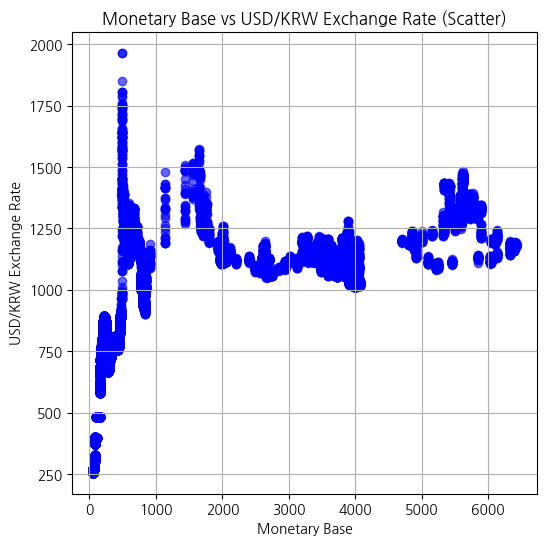

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df["본원 통화(달러 발행량)"], df["원/미국달러(매매기준율)"], alpha=0.6, color="blue")
plt.xlabel("Monetary Base")
plt.ylabel("USD/KRW Exchange Rate")
plt.title("Monetary Base vs USD/KRW Exchange Rate (Scatter)")
plt.grid(True)
plt.show()

In [ ]:
corr_ppi_fx = df[["본원 통화(달러 발행량)", "원/미국달러(매매기준율)"]].corr().iloc[0,1]
print(f"본원 통화(달러 발행량)와 환율의 상관계수: {corr_ppi_fx}")

본원 통화(달러 발행량)와 환율의 상관계수: 0.6431832699074435


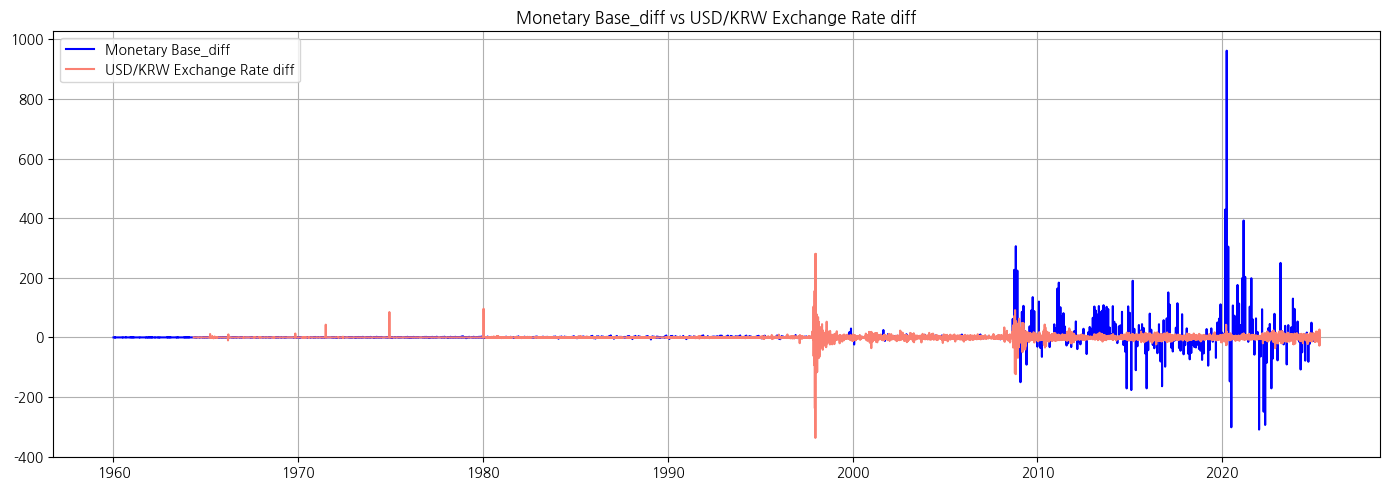

In [ ]:
df["본원 통화(달러 발행량)_diff"] = df["본원 통화(달러 발행량)"].diff()
df["환율_diff"] = df["원/미국달러(매매기준율)"].diff()

plt.figure(figsize=(14, 5))
plt.plot(df["DATE"], df["본원 통화(달러 발행량)_diff"], label="Monetary Base_diff", color="blue")
plt.plot(df["DATE"], df["환율_diff"], label="USD/KRW Exchange Rate diff", color="salmon")
plt.title("Monetary Base_diff vs USD/KRW Exchange Rate diff")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 상관관계
vol_corr = df[["본원 통화(달러 발행량)_diff", "환율_diff"]].dropna().corr()
print("본원 통화(달러 발행량) & 환율 변동폭 상관:")
print(vol_corr)

본원 통화(달러 발행량) & 환율 변동폭 상관:
                    본원 통화(달러 발행량)_diff   환율_diff
본원 통화(달러 발행량)_diff            1.000000  0.002313
환율_diff                       0.002313  1.000000


In [ ]:
df["본원 통화(달러 발행량)_lag1"] = df["본원 통화(달러 발행량)"].shift(30)
lag_corr_Monetary_Base_fx = df[["본원 통화(달러 발행량)_lag1", "원/미국달러(매매기준율)"]].corr().iloc[0,1]
print(f"본원 통화(달러 발행량) 1개월 시차 상관계수: {lag_corr_Monetary_Base_fx:.3f}")

본원 통화(달러 발행량) 1개월 시차 상관계수: 0.642


In [ ]:
# 두 시리즈를 하나로 합치고, 결측치가 있는 행은 제거 공적분검사
coint_data = df[["원/미국달러(매매기준율)", "본원 통화(달러 발행량)"]].dropna()

from statsmodels.tsa.stattools import coint
score, pvalue, _ = coint(coint_data["원/미국달러(매매기준율)"], coint_data["본원 통화(달러 발행량)"])
print("p-value:", pvalue)

p-value: 0.2550534845325483


In [ ]:
from statsmodels.tsa.stattools import adfuller

# 결측치 제거
df_clean = df[["본원 통화(달러 발행량)", "원/미국달러(매매기준율)"]].dropna()

# ADF 검정
adf_mo = adfuller(df_clean["본원 통화(달러 발행량)"])
adf_ex = adfuller(df_clean["원/미국달러(매매기준율)"])

print("본원 통화(달러 발행량) ADF p-value:", adf_mo[1])
print("원/미국달러(매매기준율) ADF p-value:", adf_ex[1])

본원 통화(달러 발행량) ADF p-value: 0.9941067507599731
원/미국달러(매매기준율) ADF p-value: 0.468930667790993


In [ ]:
# 차분
df_clean["본원 통화(달러 발행량)_diff"] = df_clean["본원 통화(달러 발행량)"].diff()
df_clean["원/미국달러(매매기준율)_diff"] = df_clean["원/미국달러(매매기준율)"].diff()

# 차분 후 ADF 검정
adf_mo_diff = adfuller(df_clean["본원 통화(달러 발행량)_diff"].dropna())
adf_ex_diff = adfuller(df_clean["원/미국달러(매매기준율)_diff"].dropna())

print("차분한 본원 통화(달러 발행량) ADF p-value:", adf_mo_diff[1])
print("차분한 원/미국달러(매매기준율) ADF p-value:", adf_ex_diff[1])


차분한 본원 통화(달러 발행량) ADF p-value: 1.4629989872724106e-29
차분한 원/미국달러(매매기준율) ADF p-value: 2.177114433517963e-30


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# 그레인저 인과성 검정을 위한 데이터 준비
granger_df = df_clean[["본원 통화(달러 발행량)_diff", "원/미국달러(매매기준율)_diff"]].dropna()

# 그레인저 인과성 검정 (최대 시차 5)
grangercausalitytests(granger_df, maxlag=5)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9087  , p=0.3405  , df_denom=22255, df_num=1
ssr based chi2 test:   chi2=0.9088  , p=0.3404  , df=1
likelihood ratio test: chi2=0.9088  , p=0.3404  , df=1
parameter F test:         F=0.9087  , p=0.3405  , df_denom=22255, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.0817  , p=0.0023  , df_denom=22252, df_num=2
ssr based chi2 test:   chi2=12.1660 , p=0.0023  , df=2
likelihood ratio test: chi2=12.1627 , p=0.0023  , df=2
parameter F test:         F=6.0817  , p=0.0023  , df_denom=22252, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.3760  , p=0.0044  , df_denom=22249, df_num=3
ssr based chi2 test:   chi2=13.1321 , p=0.0044  , df=3
likelihood ratio test: chi2=13.1283 , p=0.0044  , df=3
parameter F test:         F=4.3760  , p=0.0044  , df_denom=22249, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4011  

{np.int64(1): ({'ssr_ftest': (np.float64(0.9086895335428504),
    np.float64(0.34047271639039955),
    np.float64(22255.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.9088120259535729),
    np.float64(0.34042981977528475),
    np.int64(1)),
   'lrtest': (np.float64(0.9087934727431275),
    np.float64(0.3404347486787326),
    np.int64(1)),
   'params_ftest': (np.float64(0.9086895335606061),
    np.float64(0.34047271638580356),
    np.float64(22255.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(6.081653109710953),
    np.float64(0.002288195988592598),
    np.float64(22252.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(12.166039300991972),
    np.float64(0.0022812775807928686),
    np.int64(2)),
   'lrtest': (np.float64(12.162715434446),
    np.float64(0.002285072064124988),
    np.int64(2)),
   'params_ftest': (np.float64(6.081653109710162),
    np.float64(0.0022881959885969307),
    np.float64(22252.0),
    2.0)},
   array([[0., 0., 1.,

상관관계가 중간 정도로 강하게 나타나고,

공적분 검정에서는 두 변수 간에 장기적인 균형 관계가 없다는 결과가 나왔습니다,

그레인저 인과성 검정에서는 두 시계열 간에 유의미한 인과관계가 존재한다고 볼 수 있습니다.

따라서, 두 변수 간에는 단기적인 인과관계가 있지만, 장기적인 균형 관계는 없으며, 두 변수는 중간 정도의 선형 관계를 가지고 있다는 결론을 내릴 수 있습니다.

In [ ]:
import statsmodels.api as sm

# 결측치 제거
Monetary_Base_df = df[["본원 통화(달러 발행량)", "원/미국달러(매매기준율)"]].dropna()

# 변수 설정
X = sm.add_constant(Monetary_Base_df["본원 통화(달러 발행량)"])  # 독립변수 (상수항 포함)
y = Monetary_Base_df["원/미국달러(매매기준율)"]  # 종속변수

# OLS 회귀분석
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          원/미국달러(매매기준율)   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                 1.570e+04
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        05:12:41   Log-Likelihood:            -1.5552e+05
No. Observations:               22260   AIC:                         3.110e+05
Df Residuals:                   22258   BIC:                         3.111e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           684.0841      2.179    313.918      0.000     679.813     688.355
본원 통화(달러 발행량)     0.1260      0.001    125.318      0.000       0.124       0.128
==============================================================================
Omnibus:                      401.949   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.871
Skew:                           0.338   Prob(JB):                     9.07e-93
Kurtosis:                       2.983   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""